# Spaceship Titanic
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width="600" height="400" />

## Importing data and packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

In [93]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [94]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Data Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

#### File and Data Field Descriptions
 - train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
     - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
      - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
     - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
     - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
     - Destination - The planet the passenger will be debarking to.
     - Age - The age of the passenger.
     - VIP - Whether the passenger has paid for special VIP service during the voyage.
     - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
     - Name - The first and last names of the passenger.
     - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
 - test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
 - sample_submission.csv - A submission file in the correct format.
     - PassengerId - Id for each passenger in the test set.
     - Transported - The target. For each passenger, predict either True or False.

## Exploritary data analysis

In [95]:
print(df.describe(include = 'all'))
print('')
print('Data types of dataset:')
print(df.dtypes)
print('')
print(df.info)

       PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall        

By this EDA we can see that there is a lots of missing values we can replace them with mean, and also to do classification prediction we have to 

In [96]:
df.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [97]:
df_test.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
dtype: bool

In [98]:
df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

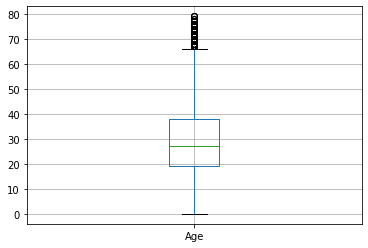

In [99]:
plt.boxplot = df.boxplot(column=['Age'])  

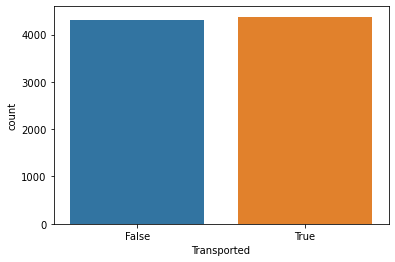

In [100]:
import seaborn as sns
sns.countplot(x ='Transported', data = df)
plt.show()

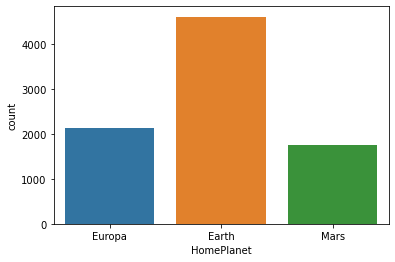

In [101]:
sns.countplot(x ='HomePlanet', data = df)
plt.show()

In [102]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Text(0.5, 1.0, 'Scatterplot of age and transported status')

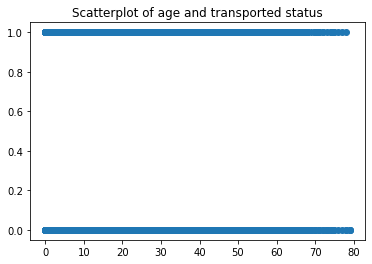

In [12]:
x1 = df['Age']
y1 = df['Transported']
plt.scatter(x1,y1)
plt.title('Scatterplot of age and transported status')


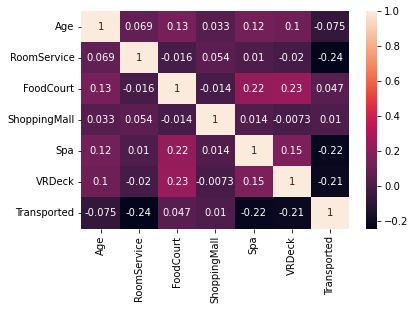

In [13]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Data preprocessing

### Replacing missing values

In [103]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mode()[0])
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mode()[0])
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0])
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mode()[0])
df['Spa'] = df['Spa'].fillna(df['Spa'].mode()[0])



In [15]:
df.isna().any()

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported     False
dtype: bool

In [104]:
cols_mode = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df_test[cols_mode].apply(lambda x: x.fillna(x.mode, inplace=True))

df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].mode()[0])
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].mode()[0])
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mode()[0])
df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].mode()[0])
df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].mode()[0])

In [105]:
df_test.isna().any()

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
dtype: bool

In [107]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [108]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Choosing the predictors and target

In [18]:
x = df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
x

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [19]:
x.isna().any()

HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

In [20]:
y = df['Transported']
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [21]:
x_pred = df_test[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [22]:
x_pred.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


### Changing data types

In [23]:
x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [24]:
x['Cabin'].value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [25]:
x['Cabin'] = x['Cabin'].str.slice(0, 1)

x['VIP'] = x['VIP'].astype(int)
x['HomePlanet'] = x['HomePlanet'].map({'Europa' : '2', 'Earth': '3', 'Mars': '1'})
x['Destination'] = x['Destination'].map({'TRAPPIST-1e' : 3, '55 Cancri e': '2', 'PSO J318.5-22': '1'})
x['Cabin'] = x['Cabin'].map({'T' : '1', 'A': '2', 'D': '3', 'C' : '4', 'B' : '5', 'E' : '6', 'G' : '7', 'F' : '8',})
x['CryoSleep'] = x['CryoSleep'].astype(int)
y = y.astype(int)

x[['HomePlanet','Destination', 'Cabin']] = x[['HomePlanet','Destination', 'Cabin']].astype('int')
print(x.head())
print(x.dtypes)

   HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0           2          0      5            3  39.0    0          0.0   
1           3          0      8            3  24.0    0        109.0   
2           2          0      2            3  58.0    1         43.0   
3           2          0      2            3  33.0    0          0.0   
4           3          0      8            3  16.0    0        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0          25.0   549.0    44.0  
2     3576.0           0.0  6715.0    49.0  
3     1283.0         371.0  3329.0   193.0  
4       70.0         151.0   565.0     2.0  
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3721274821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cabin'] = x['Cabin'].str.slice(0, 1)
C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3721274821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['VIP'] = x['VIP'].astype(int)
C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3721274821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [26]:
x_pred['Cabin'] = x_pred['Cabin'].str.slice(0, 1)
x_pred['VIP'] = x_pred['VIP'].astype(int)
x_pred['HomePlanet'] = x_pred['HomePlanet'].map({'Europa' : '2', 'Earth': '3', 'Mars': '1'})
x_pred['Destination'] = x_pred['Destination'].map({'TRAPPIST-1e' : 3, '55 Cancri e': '2', 'PSO J318.5-22': '1'})
x_pred['Cabin'] = x_pred['Cabin'].map({'T' : '1', 'A': '2', 'D': '3', 'C' : '4', 'B' : '5', 'E' : '6', 'G' : '7', 'F' : '8',})
x_pred['CryoSleep'] = x_pred['CryoSleep'].astype(int)
x_pred[['HomePlanet', 'CryoSleep', 'Destination', 'Cabin']] = x[['HomePlanet', 'CryoSleep', 'Destination','Cabin']].astype('int')
print(x_pred.head())
print(x_pred.dtypes)

   HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0           2          0      5            3  27.0    0          0.0   
1           3          0      8            3  19.0    0          0.0   
2           2          0      2            3  31.0    0          0.0   
3           2          0      2            3  38.0    0          0.0   
4           3          0      8            3  20.0    0         10.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0           0.0  2823.0     0.0  
2        0.0           0.0     0.0     0.0  
3     6652.0           0.0   181.0   585.0  
4        0.0         635.0     0.0     0.0  
HomePlanet        int32
CryoSleep         int32
Cabin             int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3488114599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_pred['Cabin'] = x_pred['Cabin'].str.slice(0, 1)
C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3488114599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_pred['VIP'] = x_pred['VIP'].astype(int)
C:\Users\Sanzhar\AppData\Local\Temp/ipykernel_2336/3488114599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [27]:
x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,0,5,3,39.0,0,0.0,0.0,0.0,0.0,0.0
1,3,0,8,3,24.0,0,109.0,9.0,25.0,549.0,44.0
2,2,0,2,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,2,0,2,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,3,0,8,3,16.0,0,303.0,70.0,151.0,565.0,2.0


In [54]:
x.describe(include = 'all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,2.350167,0.349362,6.412976,2.609801,28.728517,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820
std,0.795183,0.476796,1.687145,0.648944,14.355438,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7.000000,3.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,8.000000,3.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,3.000000,1.000000,8.000000,3.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [53]:
x_pred.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,2.351415,0.353753,6.396540,2.608137,28.431377,0.017302,215.062427,428.592238,173.233107,295.895955,304.898293
std,0.796218,0.478189,1.691576,0.650113,14.111469,0.130409,601.914503,1510.155974,554.991776,1104.872018,1235.991811
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7.000000,3.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,8.000000,3.000000,37.000000,0.000000,48.000000,66.000000,27.000000,43.000000,31.000000
max,3.000000,1.000000,8.000000,3.000000,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


## Data normalization 

In [28]:
X = np.asarray(x)
Y = np.asarray(y)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-0.44038529, -0.73277002, -0.83754342,  0.60131781,  0.71555276,
        -0.15306307, -0.33310466, -0.28102673, -0.28357863, -0.2706259 ,
        -0.26300329],
       [ 0.81725903, -0.73277002,  0.94071066,  0.60131781, -0.32940751,
        -0.15306307, -0.16807343, -0.27538657, -0.24177071,  0.21715825,
        -0.22420468],
       [-0.44038529, -0.73277002, -2.61579751,  0.60131781,  2.03916911,
         6.53325471, -0.2680006 ,  1.95999765, -0.28357863,  5.69562289,
        -0.21979574],
       [-0.44038529, -0.73277002, -2.61579751,  0.60131781,  0.29756866,
        -0.15306307, -0.33310466,  0.5230097 ,  0.33685096,  2.68717637,
        -0.09281847],
       [ 0.81725903, -0.73277002,  0.94071066,  0.60131781, -0.88671965,
        -0.15306307,  0.12565187, -0.2371588 , -0.03105877,  0.23137418,
        -0.26123971]])

In [29]:
X_pred = np.asarray(x_pred)
X_pred = preprocessing.StandardScaler().fit(X_pred).transform(X_pred)
X_pred[0:5]

array([[-0.44140647, -0.73986153, -0.82568155,  0.60283277, -0.10144546,
        -0.13268938, -0.35733908, -0.28383979, -0.31217285, -0.26784148,
        -0.24671194],
       [ 0.81467835, -0.73986153,  0.94802011,  0.60283277, -0.6684265 ,
        -0.13268938, -0.35733908, -0.27787944, -0.31217285,  2.28750433,
        -0.24671194],
       [-0.44140647, -0.73986153, -2.59938322,  0.60283277,  0.18204506,
        -0.13268938, -0.35733908, -0.28383979, -0.31217285, -0.26784148,
        -0.24671194],
       [-0.44140647, -0.73986153, -2.59938322,  0.60283277,  0.67815346,
        -0.13268938, -0.35733908,  4.12151827, -0.31217285, -0.10400244,
         0.2266475 ],
       [ 0.81467835, -0.73986153,  0.94802011,  0.60283277, -0.59755387,
        -0.13268938, -0.34072348, -0.28383979,  0.83212203, -0.26784148,
        -0.24671194]])

## Train/test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6954, 11) (6954,)
Test set: (1739, 11) (1739,)


## Modeling

### K-Nearest Neighbors classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    print(i)
    print("Train acc", metrics.accuracy_score(y_train, knn.predict(X_train)))
    print("Test acc", metrics.accuracy_score(y_test,pred_i))
    print('Sum acc', metrics.accuracy_score(y_train, knn.predict(X_train)) + metrics.accuracy_score(y_test,pred_i))

1
Train acc 0.9200460166810469
Test acc 0.7257044278320874
Sum acc 1.6457504445131343
2
Train acc 0.8267184354328444
Test acc 0.7343300747556066
Sum acc 1.561048510188451
3
Train acc 0.8445498993385102
Test acc 0.7510063254744106
Sum acc 1.595556224812921
4
Train acc 0.8239861949956859
Test acc 0.7469810235767682
Sum acc 1.5709672185724541
5
Train acc 0.8259994247914869
Test acc 0.7596319723979299
Sum acc 1.5856313971894167
6
Train acc 0.815645671555939
Test acc 0.7527314548591144
Sum acc 1.5683771264150534
7
Train acc 0.8213977566867989
Test acc 0.7768832662449684
Sum acc 1.5982810229317672
8
Train acc 0.812482024733966
Test acc 0.7688326624496837
Sum acc 1.5813146871836499
9
Train acc 0.817083692838654
Test acc 0.7832087406555491
Sum acc 1.6002924334942032
10
Train acc 0.8101811906816221
Test acc 0.772857964347326
Sum acc 1.5830391550289482
11
Train acc 0.813057233247052
Test acc 0.7694077055779184
Sum acc 1.5824649388249705
12
Train acc 0.8090307736554501
Test acc 0.7740080506037953

In [32]:
# as we can see optimal value for k is 9
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat_knn = neigh.predict(X_test)
print(y_test[0:5])
print(yhat_knn[0:5])
print('KNN`s accuracy', metrics.accuracy_score(y_test,pred_i))
print('Classification report for Knn classifictaion', classification_report(y_test, yhat_knn))

[0 1 0 0 0]
[0 1 0 0 0]
KNN`s accuracy 0.7832087406555491
Classification report for Knn classifictaion               precision    recall  f1-score   support

           0       0.78      0.79      0.79       881
           1       0.78      0.78      0.78       858

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



### Decision tree classification

In [33]:
from sklearn.tree import DecisionTreeClassifier
for i in ('gini', 'entropy'):
    drugTree = DecisionTreeClassifier(criterion=i, max_depth = 4)
    drugTree.fit(X_train,y_train)
    pred_i= drugTree.predict(X_test)
    print(i)
    print("Train acc", metrics.accuracy_score(y_train, knn.predict(X_train)))
    print("Test acc", metrics.accuracy_score(y_test,pred_i))
    print('Sum acc', metrics.accuracy_score(y_train, knn.predict(X_train)) + metrics.accuracy_score(y_test,pred_i))

gini
Train acc 0.8028472821397756
Test acc 0.7745830937320299
Sum acc 1.5774303758718056
entropy
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749


In [34]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
yhat_dt= drugTree.predict(X_test)
print (yhat_dt [0:5])
print (y_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_dt))
print('Classification report for Decision Tree classification:', classification_report(y_test, yhat_dt))

[0 1 0 0 0]
[0 1 0 0 0]
DecisionTrees's Accuracy:  0.7757331799884991
Classification report for Decision Tree classification:               precision    recall  f1-score   support

           0       0.84      0.69      0.76       881
           1       0.73      0.86      0.79       858

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.77      1739
weighted avg       0.78      0.78      0.77      1739



### Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
for i in ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'):
    LR_n = LogisticRegression(C=0.01, solver=i)
    LR_n.fit(X_train,y_train)
    pred_i= drugTree.predict(X_test)
    print(i)
    print("Train acc", metrics.accuracy_score(y_train, knn.predict(X_train)))
    print("Test acc", metrics.accuracy_score(y_test,pred_i))
    print('Sum acc', metrics.accuracy_score(y_train, knn.predict(X_train)) + metrics.accuracy_score(y_test,pred_i))

newton-cg
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749
lbfgs
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749
liblinear
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749
sag
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749
saga
Train acc 0.8028472821397756
Test acc 0.7757331799884991
Sum acc 1.5785804621282749


In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print(yhat_lr[0:5])
print(y_test[0:5])
print("Logistic regression accuracy: ", metrics.accuracy_score(y_test, yhat_lr))
print('Classification report for Logistic regression:', classification_report(y_test, yhat_lr))

[0 1 0 0 0]
[0 1 0 0 0]
Logistic regression accuracy:  0.7671075330649799
Classification report for Logistic regression:               precision    recall  f1-score   support

           0       0.75      0.80      0.78       881
           1       0.78      0.73      0.76       858

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



### SVM (Support Vector Machines) classification

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]
print(yhat_lr[0:5])
print(y_test[0:5])
print("SVM accuracy: ", metrics.accuracy_score(y_test, yhat_lr))
print('Classification report for SVM classification', classification_report(y_test, yhat_lr))

[0 1 0 0 0]
[0 1 0 0 0]
SVM accuracy:  0.7671075330649799
Classification report for SVM classification               precision    recall  f1-score   support

           0       0.75      0.80      0.78       881
           1       0.78      0.73      0.76       858

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



## Model evaluation

In [38]:
knn_acc = metrics.accuracy_score(y_test, yhat_knn)
dt_acc = metrics.accuracy_score(y_test, yhat_dt)
lr_acc =metrics.accuracy_score(y_test, yhat_lr)
svm_acc = metrics.accuracy_score(y_test, yhat_svm)

In [39]:
models = pd.DataFrame({
    'Model' : ['KNN calssification', 'Decision Tree Classification', 'Logistic regression classification',
             'SVM classification'],
    'Score' : [knn_acc, dt_acc, lr_acc, svm_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,SVM classification,0.790109
0,KNN calssification,0.783209
1,Decision Tree Classification,0.775733
2,Logistic regression classification,0.767108


As we can see svm have best values of accuracy

## Predicting test dataset

I decided to choose knn classifier

In [90]:
knn_pr = KNeighborsClassifier(n_neighbors = 9).fit(X, Y)
predict = knn_pr.predict(x_pred)
df_pred =pd.DataFrame(predict)
print(df_pred)



      0
0     0
1     0
2     0
3     1
4     1
...  ..
4272  0
4273  1
4274  0
4275  1
4276  0

[4277 rows x 1 columns]


In [92]:
df_test['transported'] = predict.tolist()
print(df_test)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth      False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa      False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth      False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth      False   G/160/P    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  18.0  False   
4275     9273_01     Europa      False   D/297/P    TRAPPIST-1e  18.0  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingM